In [121]:
import os
import glob
import numpy as np
import pandas as pd
import scipy.sparse
from sklearn.cross_decomposition import PLSRegression
%matplotlib inline

In [122]:
X_train = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions.npz")
X_test  = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions.npz")

X_train_nouns = scipy.sparse.load_npz("data/processed_descriptions/train_descriptions_nouns.npz")
X_test_nouns  = scipy.sparse.load_npz("data/processed_descriptions/test_descriptions_nouns.npz")

In [8]:
Y_train = scipy.sparse.load_npz("data/processed_tags/train_tag_nocat_tfdif.npz")
Y_test  = scipy.sparse.load_npz("data/processed_tags/test_tag_nocat_tfdif.npz")

In [9]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(10000, 7038) (2000, 7038) (10000, 92) (2000, 92)


In [257]:
resnet_fc1000_train = pd.read_csv("data/features_train/features_resnet1000_train.csv", header = None)
resnet_train = pd.read_csv("data/features_train/features_resnet1000intermediate_train.csv", header = None)

resnet_fc1000_test = pd.read_csv("data/features_test/features_resnet1000_test.csv", header = None)
resnet_test = pd.read_csv("data/features_test/features_resnet1000intermediate_test.csv", header = None)

print(resnet_train.shape, resnet_test.shape)
print(resnet_fc1000_train.shape, resnet_fc1000_test.shape)

(10000, 2049) (2000, 2049)
(10000, 1001) (2000, 1001)


In [258]:
tr_idx = resnet_train[0].str.extract('(\d+)')
te_idx = resnet_test[0].str.extract('(\d+)')

resnet_train[0] = tr_idx.iloc[:, 0].astype(float)
resnet_test[0] = te_idx.iloc[:, 0].astype(float)

resnet_fc1000_train[0] = tr_idx.iloc[:, 0].astype(float)
resnet_fc1000_test[0] = te_idx.iloc[:, 0].astype(float)

In [262]:
resnet_train.sort_values(by = resnet_train.columns[0], inplace = True)
resnet_fc1000_train.sort_values(by = resnet_fc1000_train.columns[0], inplace = True)

resnet_test.sort_values(by = resnet_test.columns[0], inplace = True)
resnet_fc1000_test.sort_values(by = resnet_fc1000_test.columns[0], inplace = True)

In [263]:
resnet_fc1000_train[0:10]

0         1         2         3         4         5         6     \
6657   0.0 -1.834406 -1.622819 -3.162837 -3.794578 -2.768318 -1.414913   
2262   1.0 -0.650736 -0.545554  0.263755 -2.006821  1.107728  2.280868   
8604   2.0 -0.447969  0.240307  0.012997 -0.220894  0.527846  1.460366   
9240   3.0 -0.380667 -0.171367 -2.367256 -2.991788 -2.893003  0.463457   
8416   4.0 -0.744654  0.763253 -4.294244 -3.185857 -0.734778  0.785416   
8323   5.0 -3.193833 -2.073547 -1.944029 -3.984772 -2.574586 -1.298000   
4986   6.0  0.031363  1.719209 -0.277762 -0.930154 -0.322277  1.103601   
585    7.0 -0.780366 -2.091036 -1.490997 -2.581203 -3.703265 -1.731256   
6967   8.0 -2.846962 -2.201382 -0.813227 -2.285110 -1.946816 -0.626090   
1629   9.0  0.509871 -2.234324  2.250350  1.420888  2.742299  1.543025   

          7         8         9       ...         991       992       993   \
6657 -4.403519 -1.180648 -1.423677    ...    -0.083204 -3.779408 -5.016703   
2262 -2.661141 -1.731107 -3.769250    ...     0.740441 -2.158106 -5.109899   
8604 -0.791718 -1.277997 -1.514872    ...    -0.938034 -0.970953 -1.596353   
9240 -5.052582 -2.571710 -2.735305    ...    -1.452871 -3.798264 -4.061139   
8416 -3.080476 -2.852697 -1.663874    ...     2.066224 -0.154011 -0.285708   
8323 -5.237830 -2.104873 -3.236042    ...     1.381305 -2.359940 -3.417674   
4986 -0.988631 -2.672785 -2.625408    ...    -0.181573 -0.646388 -2.718604   
585  -4.994765 -0.736106  0.026259    ...    -0.344375 -1.770938 -1.844912   
6967 -4.412762 -1.544663 -0.803643    ...    -0.819256 -2.427044 -3.297481   
1629  3.550300 -0.044653 -0.489779    ...    -1.787546 -2.445015 -2.814011   

          994       995       996       997       998       999       1000  
6657 -1.285902 -2.960930 -1.148877 -0.049625 -3.162613  0.529798 -1.689086  
2262 -2.212715 -1.916029  0.301129 -0.793444 -4.520153  1.577479  0.889375  
8604 -1.151252 -0.434559  1.362955  0.261901 -1.375330  1.217235  0.676751  
9240 -2.312868 -2.737517  1.276119  0.790399 -2.439589  1.360806 -1.680341  
8416 -0.347980  0.036557  2.184156  6.247551  2.735642  4.591597  0.726212  
8323 -4.332884 -3.322051 -0.301803  0.238282 -4.794117  0.527458  0.535900  
4986 -2.289716 -0.058985  2.124127 -0.350611 -3.867087  0.894692 -2.095897  
585  -0.352946 -0.347076  2.965708  1.193612 -2.626528  0.776350 -1.606064  
6967 -2.458429 -0.520406 -0.398185  0.931711 -1.459438  0.971677  2.208594  
1629 -1.605324 -1.056252 -0.466234 -0.432178 -3.766554 -1.077046 -2.312391  

[10 rows x 1001 columns]

In [264]:
resnet_train.index = resnet_train[0].astype(int)
resnet_fc1000_train.index = resnet_fc1000_train[0].astype(int)

resnet_test.index = resnet_test[0].astype(int)
resnet_fc1000_test.index = resnet_fc1000_test[0].astype(int)

In [265]:
resnet_train.drop(resnet_train.columns[0], axis = 1, inplace = True)
resnet_fc1000_train.drop(resnet_fc1000_train.columns[0], axis = 1, inplace = True)

resnet_test.drop(resnet_test.columns[0], axis = 1, inplace = True)
resnet_fc1000_test.drop(resnet_fc1000_test.columns[0], axis = 1, inplace = True)

In [266]:
resnet_fc1000_train[0:10]

1         2         3         4         5         6         7     \
0                                                                         
0 -1.834406 -1.622819 -3.162837 -3.794578 -2.768318 -1.414913 -4.403519   
1 -0.650736 -0.545554  0.263755 -2.006821  1.107728  2.280868 -2.661141   
2 -0.447969  0.240307  0.012997 -0.220894  0.527846  1.460366 -0.791718   
3 -0.380667 -0.171367 -2.367256 -2.991788 -2.893003  0.463457 -5.052582   
4 -0.744654  0.763253 -4.294244 -3.185857 -0.734778  0.785416 -3.080476   
5 -3.193833 -2.073547 -1.944029 -3.984772 -2.574586 -1.298000 -5.237830   
6  0.031363  1.719209 -0.277762 -0.930154 -0.322277  1.103601 -0.988631   
7 -0.780366 -2.091036 -1.490997 -2.581203 -3.703265 -1.731256 -4.994765   
8 -2.846962 -2.201382 -0.813227 -2.285110 -1.946816 -0.626090 -4.412762   
9  0.509871 -2.234324  2.250350  1.420888  2.742299  1.543025  3.550300   

       8         9         10      ...         991       992       993   \
0                                  ...                                    
0 -1.180648 -1.423677 -2.615084    ...    -0.083204 -3.779408 -5.016703   
1 -1.731107 -3.769250 -1.451552    ...     0.740441 -2.158106 -5.109899   
2 -1.277997 -1.514872 -3.339529    ...    -0.938034 -0.970953 -1.596353   
3 -2.571710 -2.735305 -2.292918    ...    -1.452871 -3.798264 -4.061139   
4 -2.852697 -1.663874 -2.074536    ...     2.066224 -0.154011 -0.285708   
5 -2.104873 -3.236042 -0.056533    ...     1.381305 -2.359940 -3.417674   
6 -2.672785 -2.625408 -1.624237    ...    -0.181573 -0.646388 -2.718604   
7 -0.736106  0.026259 -1.350068    ...    -0.344375 -1.770938 -1.844912   
8 -1.544663 -0.803643 -1.054743    ...    -0.819256 -2.427044 -3.297481   
9 -0.044653 -0.489779  2.557454    ...    -1.787546 -2.445015 -2.814011   

       994       995       996       997       998       999       1000  
0                                                                        
0 -1.285902 -2.960930 -1.148877 -0.049625 -3.162613  0.529798 -1.689086  
1 -2.212715 -1.916029  0.301129 -0.793444 -4.520153  1.577479  0.889375  
2 -1.151252 -0.434559  1.362955  0.261901 -1.375330  1.217235  0.676751  
3 -2.312868 -2.737517  1.276119  0.790399 -2.439589  1.360806 -1.680341  
4 -0.347980  0.036557  2.184156  6.247551  2.735642  4.591597  0.726212  
5 -4.332884 -3.322051 -0.301803  0.238282 -4.794117  0.527458  0.535900  
6 -2.289716 -0.058985  2.124127 -0.350611 -3.867087  0.894692 -2.095897  
7 -0.352946 -0.347076  2.965708  1.193612 -2.626528  0.776350 -1.606064  
8 -2.458429 -0.520406 -0.398185  0.931711 -1.459438  0.971677  2.208594  
9 -1.605324 -1.056252 -0.466234 -0.432178 -3.766554 -1.077046 -2.312391  

[10 rows x 1000 columns]

In [280]:
pls2 = PLSRegression(n_components = 100)

In [281]:
pls2.fit(X_train_nouns.toarray(), Y_train.toarray())
# pls2.fit(X_train.toarray(), Y_train.toarray())
# pls2.fit(X_train_nouns.toarray(), resnet_fc1000_train)

/Users/bielskic/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:77: UserWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached')


PLSRegression(copy=True, max_iter=500, n_components=100, scale=True,
       tol=1e-06)

In [282]:
X_test_pred = pls2.predict(X_test_nouns.toarray())
# X_test_pred = pls2.predict(X_test.toarray())
# X_test_pred = pls2.predict(resnet_fc1000_test)

In [283]:
print(X_test_pred.shape, Y_test.shape)
# print(X_test_pred.shape, resnet_fc1000_test.shape)

(2000, 92) (2000, 92)


In [285]:
test = X_test_pred * Y_test.T
# test = X_test_pred * np.matrix(resnet_fc1000_test).T
print(test.shape)

(2000, 2000)


In [249]:
def load_descriptions(path):
    data = []
    for filename in glob.glob(os.path.join(path, "*.txt")):
        with open(filename, "r") as description_file:
            label = os.path.splitext(os.path.basename(filename))[0]
            sentence = " ".join(line.strip() for line in description_file)
            new_row = (sentence, label) 
            data.append(new_row)

    dt = np.dtype([('sentence', object), ('label', 'int64')])
    return(np.array(data, dtype = dt))

train_descriptions_path = "data/descriptions_train/"
test_descriptions_path = "data/descriptions_test/"

train_data = load_descriptions(train_descriptions_path)
test_data = load_descriptions(test_descriptions_path)

train_data.sort(order = 'label', axis = 0)
test_data.sort(order = 'label', axis = 0)

('A woman walking down a street past a doorway. a woman is walking past a doorway on a sidewalk A woman talking on a cell phone checks her watch. A woman talks on a cell phone and checks her watch while walking on a sidewalk. A woman wearing blue is on the phone and walking along a sidewalk in front of a building with black planters on both sides of the entrance.', 0)

359


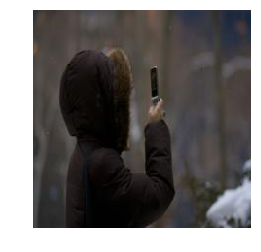

36


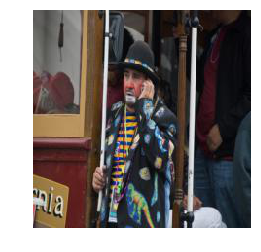

1231


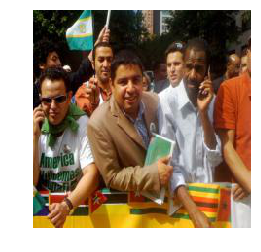

1131


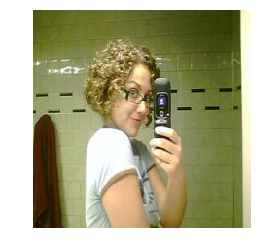

292


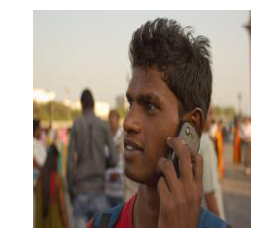

1743


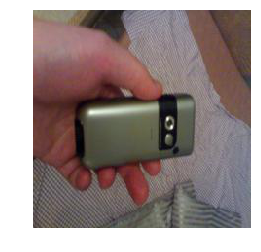

942


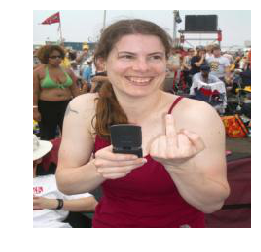

1862


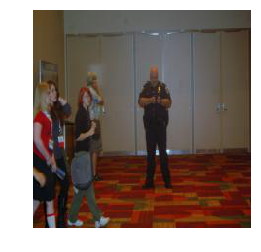

1698


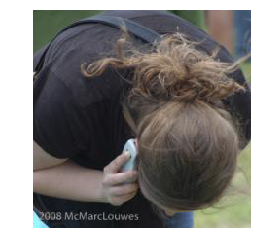

124


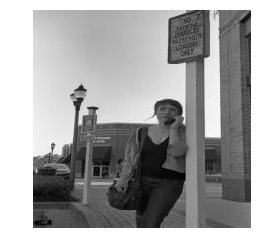

1117


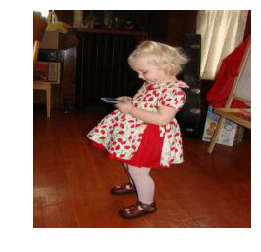

949


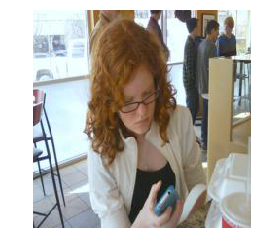

255


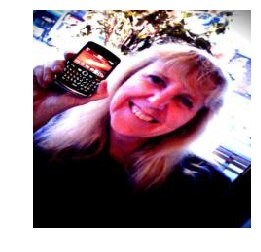

1479


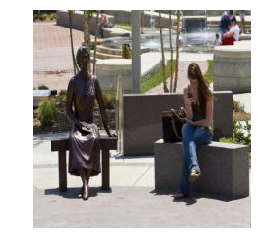

381


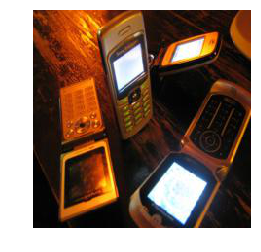

1086


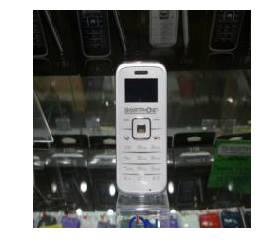

250


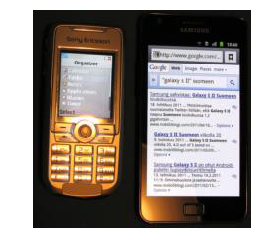

1343


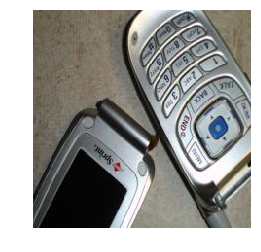

388


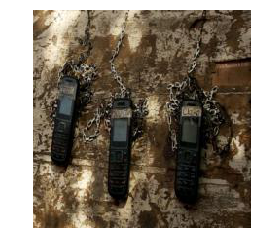

311


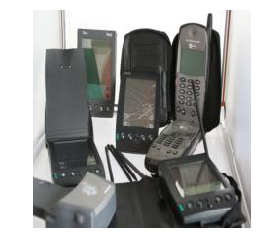

In [286]:
from PIL import Image
import matplotlib.pyplot as plt

print(test_data[0])
print()

for i in np.argsort(test[0])[::-1][0:20]:
# for i in np.argsort(test[0].tolist())[::-1][0:20]:
    print(i)
    img = Image.open("./data/images_test/" + str(i) + ".jpg")
    img = np.asarray(img)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

('A woman walking down a street past a doorway. a woman is walking past a doorway on a sidewalk A woman talking on a cell phone checks her watch. A woman talks on a cell phone and checks her watch while walking on a sidewalk. A woman wearing blue is on the phone and walking along a sidewalk in front of a building with black planters on both sides of the entrance.', 0)



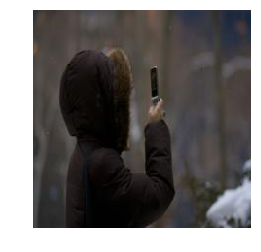

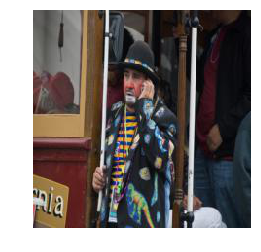

('A large slice of angel food cake sitting on top of a plate. A small plate contains a large slice of cake. A quarter of a cake on a plate A large piece of yellow cake sits on a plate. A large slab of sponge cake sits upon a flowery plate.', 1)



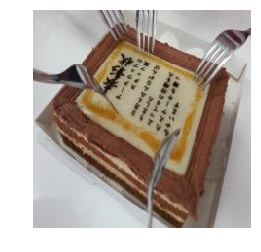

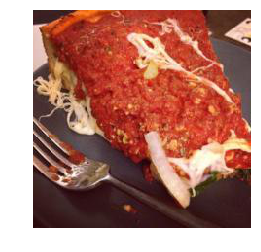

('A group of traffic lights sitting above an intersection. The sign shining down over the street lights A picture of a stoplight from a window. The sun surrounded by an airplane and traffic lights Several street lights and an airplane flying overhead.', 2)



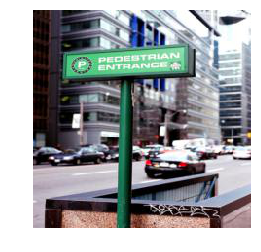

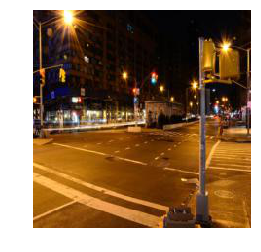

('Two mean in uniform are riding horses side by side on a sandy beach. Two police officers on horses riding on the beach. two people riding on horses in the middle of a lot A pair of police officers ride on horses down the beach. Two people in neon vests riding horses down the beach.', 3)



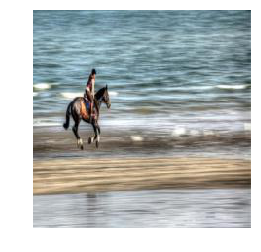

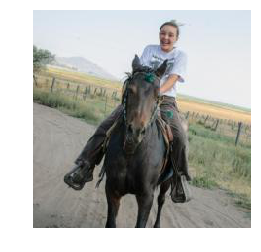

('Man and woman using pay phones at adjacent booths. Adults using pay telephones outdoors while standing next to soda machine. A couple of people on phones standing together. A man and woman are talking on public pay phones. a couple of people that are talking on a phone', 4)



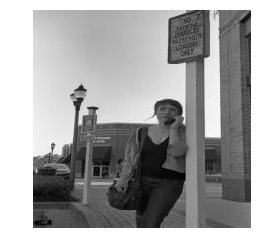

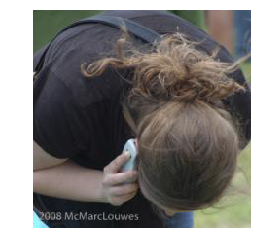

('a man is doing a trick on a skateboard A skateboarder doing a trick in the air, on a wooden ramp with a blue sky and clouds in the background. A person is performing a trick on a skateboard. there is a skateboarder that has jumped on to a ramp A man is jumping on a skateboard in a park.', 5)



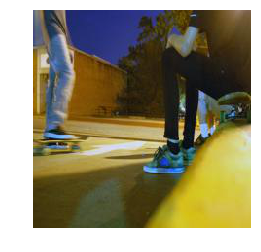

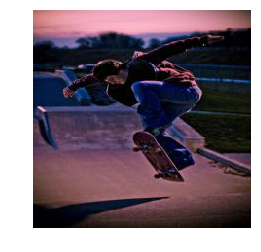

('A person on skis is in the air. There is a person jumping in the air on a pair of skis. The person gets airborne while skiing down the slope. The skier is doing a trick in the air. A skier is mid air on the slopes.', 6)



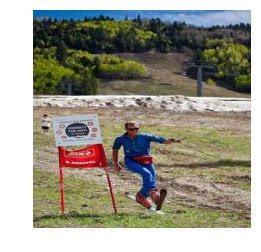

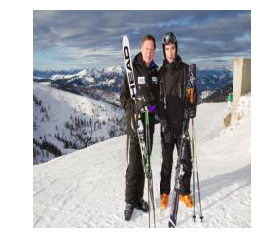

('A man standing next to a zebra on a lawn. a guy showing off a zebra at a building A young man poses next to a zebra in a grassy wildlife exhibit. A man standing next to  zebra on the grass A man standing next to a zebra gesturing toward it.', 7)



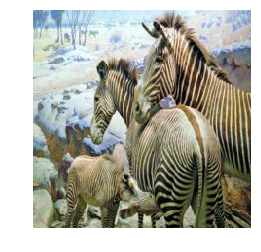

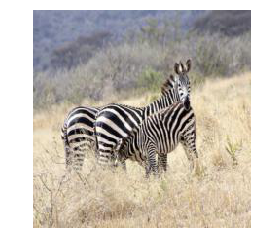

('an orange fire truck parked in a wharehouse An antique truck displayed in a work garage. A red fire engine is parked in the fire station. A red fire engine is inside of a building. The old model fire truck sat alone in the room.', 8)



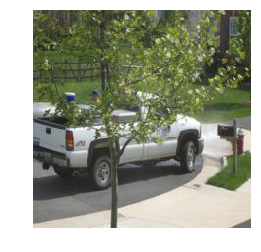

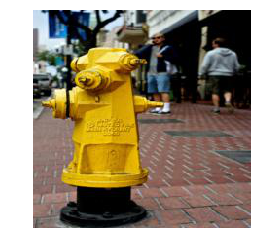

('A few people that are standing with skateboards. A group of skateboarders standing at the top of a ramp with their skateboards resting against the top of the ramp. There are four boys standing at the ready with their skateboards. Four skateboarders stand at the top of a ramp, with their boards, ready to skate. some guys standing on top of ramp with their skateboads', 9)



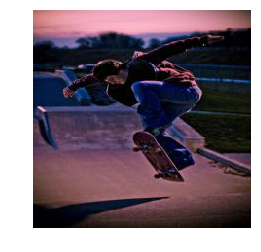

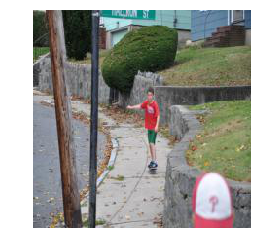

('A no left turn sign hanging from the side of a wooden pole. a sign on the road and many vehicles in a park A picture of a street on a busy city street. A green traffic light sits near a parking lot and a white building. A right turn sign turned upside down on a pole.', 10)



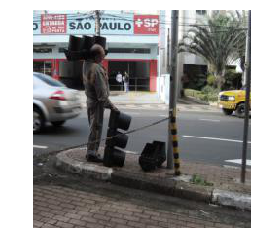

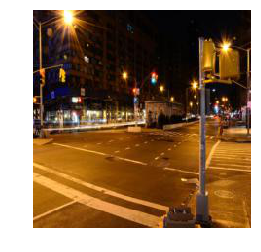

('a person riding a skate board ata skate park Bright light showcasing a skateboarder flipping up off the ramp. A man riding up the side of a dry pool on a skateboard. a boy performing a skateboard trick in a skate bowl at night A person that is doing a skateboarding trick in the air.', 11)



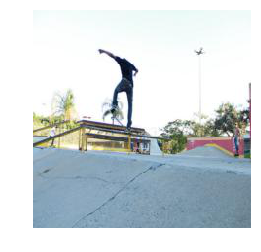

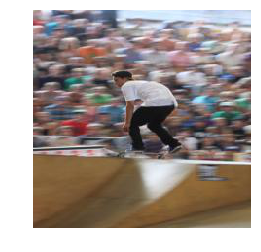

('A white compact car parked on a sandy dirt road. A car being driven onto two white flat things A man getting in a sport utility vehicle with surf boards on the roof. Man standing in open door of car on a desert road. A man gets back into his car in the desert.', 12)



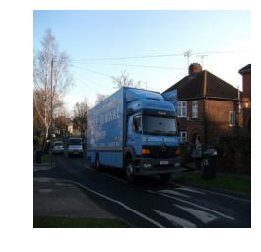

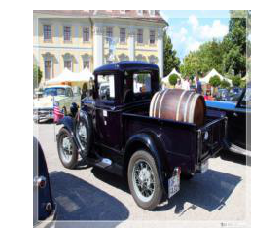

('Two people pose for a picture while holding up their skis. Two skiers in the middle of a snowstorm. Two people with skis stand next to each other. Two people in the snow, holding and wearing skis. Two skiers pose side by side for a picture', 13)



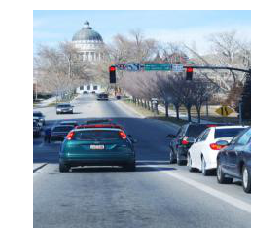

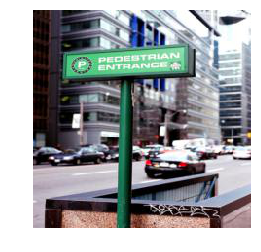

('A skier stands posing while two others are skiing towards him. a group of people riding skis on a snowy surface A group of people standing on a ski slope with trees in the background. Three men walking along snow with their skis on. Three people are standing in the snow wearing snow skis.', 14)



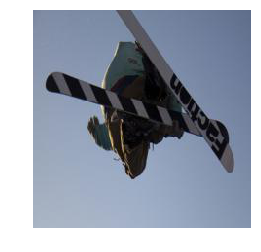

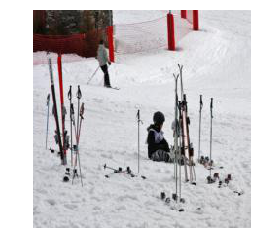

('A pizza sitting on top of a wooden cutting board. The pizza is loaded with melted cheese and vegetables such as green peppers. A pizza with bell peppers, meat, and sauce. A vegetable pizza that has been sliced into pieces. a pizza and a pizza cutter and some green pepper toppings', 15)



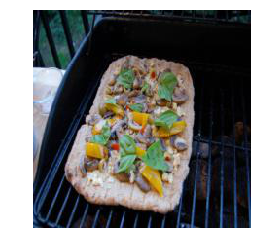

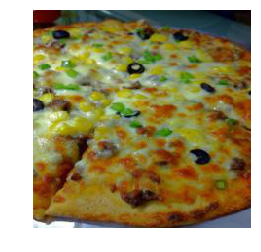

('A man holding up a yellow frisbee while smiling. A man holding a frisbee in the field close to some buildings a male in a tan shirt and a frisbee A man is holding a frisbee that reads "queer\' on it. a close up of a person holding a frisbee in a field', 16)



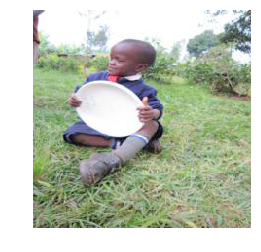

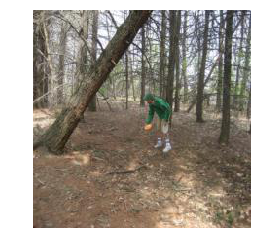

('A man is holding a couple of traffic lights on the side of the road. A man carrying two traffic lights on the side of a street. a man in a tan jacket is carrying a traffic light a man holding some street lights as he stands next to the road A man holding the streetlights in his hands near a street', 17)



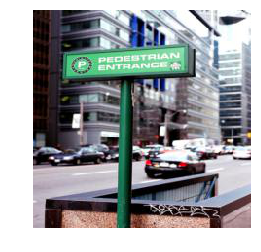

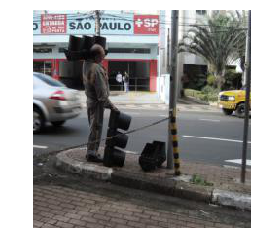

('A couple riding on top of an elephant in a forest. People under a canopy riding an elephant through a forest. A group of people riding an elephant through a forest. An elephant with people riding on its back. people riding an elephant down a shady trail', 18)



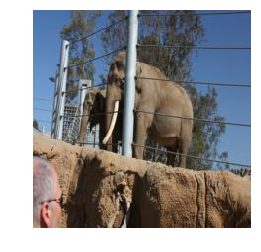

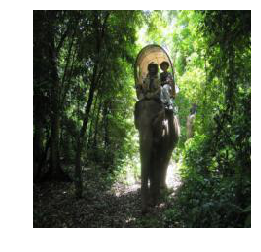

('A surfer in the ocean preparing to stand on a surfboard. A man riding a wave on a surfboard in the ocean. A man attempts to stand on a surfboard. A man is riding in a tiny wave. The man is on a surfboard coming in to the shore.', 19)



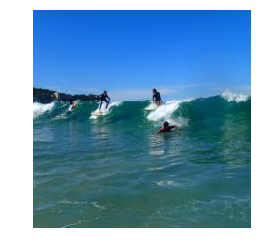

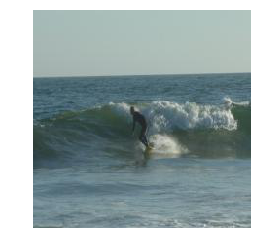

In [288]:
for i in (range(20)):
    print(test_data[i])
    print()
    for j in np.argsort(test[i])[::-1][0:2]:
        img = Image.open("./data/images_test/" + str(j) + ".jpg")
        img = np.asarray(img)
        plt.imshow(img)
        plt.axis('off')
        plt.show()